# GRIP @ The Sparks Foundation

## Data Science & Business Analytics Intern

## Author : Imen Frikha

## Task 1 : Prediction using Supervised ML

**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. The task has two variables where features is the no. of study hours and the target value is the percentage score.**

### Importing required libraries 

In [1]:
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Reading data from remote url

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

### Exploring data

In [3]:
# Get the first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Get the last 5 rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Get the number of rows and columns
data.shape

(25, 2)

In [6]:
# Get information about a DataFrame including the index dtype and columns, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# Generate descriptive statistics. 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the relationship between "Hours" and "Scores" Columns

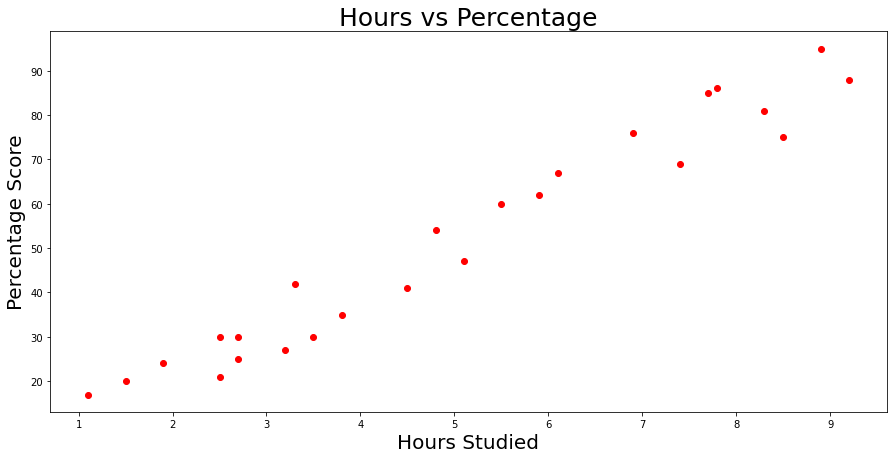

In [8]:
# Plotting the distribution of scores
plt.figure(figsize=(15,7))
plt.scatter(data['Hours'],data['Scores'],color='red')
plt.title("Hours vs Percentage",fontsize=25)
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentage Score',fontsize=20)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the two variables: The more students dedicates their time to study, the higher their score.**

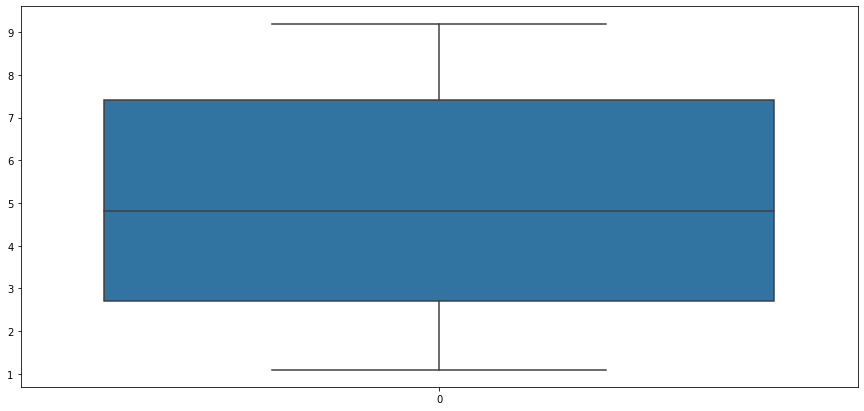

In [9]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data['Hours'])
plt.show()

### Correlation

In [10]:
#Find the pairwise correlation of the two columns in the dataframe
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Preparing the data
**This step is to divide the data into "attributes" (inputs) and "labels" (outputs).**

In [11]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

### Splitting the data into Training set and Testing set
**This step is to split this data into training and test sets.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [13]:
X_train.shape ,X_test.shape

((20, 1), (5, 1))

In [14]:
y_train.shape , y_test.shape

((20,), (5,))

### StandardScalar (Standardization)

In [15]:
st=StandardScaler() 

In [16]:
st.fit_transform(X_train,y_train)

array([[-0.57932795],
       [-1.34371899],
       [ 1.02991635],
       [ 0.66783639],
       [-1.66556785],
       [-0.05632355],
       [ 0.98968525],
       [-0.78048349],
       [ 1.23107189],
       [ 1.59315186],
       [ 0.34598753],
       [-0.70002127],
       [-1.02187013],
       [ 0.10460088],
       [-1.02187013],
       [ 1.31153411],
       [-1.10233235],
       [-0.17701687],
       [ 1.47245854],
       [-0.2977102 ]])

### Model Training

In [17]:
regressor=LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
regressor.score(X_train,y_train)

0.9515510725211552

### Plotting the regression line

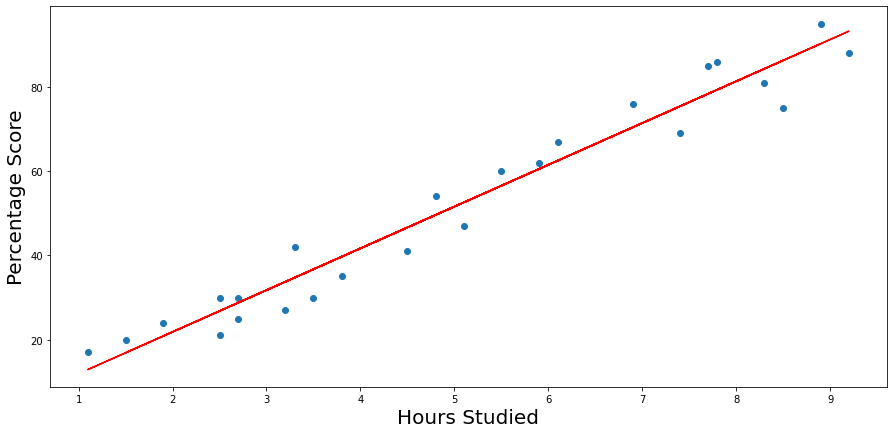

In [20]:
plt.figure(figsize=(15,7))
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X,Y)
plt.plot(X, line,color='red');
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentage Score',fontsize=20)
plt.show()

### Making predictions 

In [21]:
# Testing data
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# Predicting the scores
y_pred=regressor.predict(X_test) 

In [23]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

###  Comparing Actual result vs Predicted result

In [24]:
New_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
# Estimating training and test score
print("Training score :",regressor.score(X_train,y_train))
print("Test score :",regressor.score(X_test,y_test))

Training score : 0.9515510725211552
Test score : 0.9454906892105356


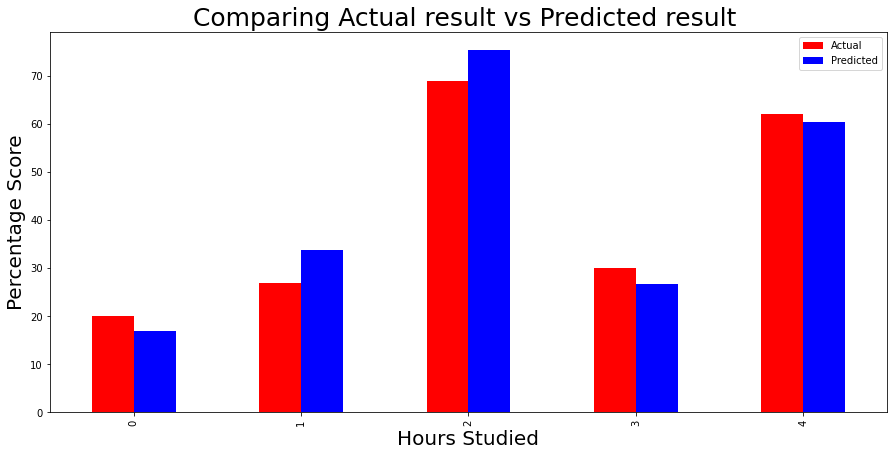

In [26]:
New_data.plot(kind='bar',figsize=(15,7),color={"Actual": "red", "Predicted": "blue"})
plt.title("Comparing Actual result vs Predicted result ",fontsize=25)
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentage Score',fontsize=20)
plt.show()

### What will be predicted score if a student studies for 9.25 hrs/day?

In [27]:
# Testing the model with our own data
Hours = 9.25
own_pred = regressor.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the model
**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.**

In [28]:
print('MAE :',metrics.mean_absolute_error(y_test, y_pred))
print('MSE :',metrics.mean_squared_error(y_test, y_pred)) 
print('R2 Score :',r2_score(y_test,y_pred))

MAE : 4.183859899002975
MSE : 21.5987693072174
R2 Score : 0.9454906892105356


# Thank you